# Homework 1: Exploration & Exploitation Aitthikit Kitcharoennon 65340500062

## Class define

In [321]:
# !pip install numpy

In [322]:
# !pip install matplotlib

In [323]:
import numpy as np
import matplotlib.pyplot as plt

class Multi_Armed_Bandit:
    def __init__(self, n: int, mean_range=(-1, 1), std_dev=1.0 , mode = 0):
        self.n = n
        self.means = np.random.uniform(mean_range[0], mean_range[1], n)  # random reward means
        self.std_dev = std_dev  # Fixed standard deviation
        self.fix = [-0.50771065, -0.78082101,  0.59902529,  0.67058601,  0.82758957,  0.49655859, 0.63167973,  0.80476759,  0.41086208, -0.83697453] # Fixed reward means
        self.mode = mode
    
    def pull(self, arm: int) -> float:
        if self.mode == 1: # random mode
            if 0 <= arm < self.n:
                return np.random.normal(self.means[arm], self.std_dev)
            else:
                raise ValueError("Invalid bandit arm index.")
        else: # Fixed mode
            if 0 <= arm < self.n:
                return np.random.normal(self.fix[arm], self.std_dev)
            else:
                raise ValueError("Invalid bandit arm index.")
            
    def best_arm(self) -> int:
        if self.mode == 1:
            return np.argmax(self.means)
        else:
            return np.argmax(self.fix)
    
    def get_means(self):
        if self.mode == 1:
            return self.means
        else:
            return self.fix
    
class Agent_greedy:
    def __init__(self, n: int, epsilon=0.1):
        self.n = n
        self.epsilon = epsilon
        self.values = np.zeros(n)  
        self.action_counts = np.zeros(n) 
    
    def select_action(self) -> int:
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n)
        else:
            return np.argmax(self.values)
    
    def update(self, action: int, reward: float):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        value = self.values[action]
        self.values[action] = ((n - 1) / n) * value + (1 / n) * reward
        
    def get_value(self):
        return np.argmax(self.values)
    
    def reset(self): # Reset for experiment
        self.values = np.zeros(self.n) 
        self.action_counts = np.zeros(self.n)  

class Agent_UCB:
    def __init__(self, n: int, c = 0.7):
        self.n = n
        self.c = c # c value of UCB
        self.values = np.zeros(n) 
        self.action_counts = np.zeros(n) 
        self.total_count = 0
    
    def select_action(self) -> int:
        UCB_value = self.values + self.c * np.sqrt(np.log(self.total_count + 1) / (self.action_counts + 1e-5)) # 1e-5 for not zero division
        return np.argmax(UCB_value)
    
    def update(self, action: int, reward: float):
        self.action_counts[action] += 1
        self.total_count += 1
        n = self.action_counts[action]
        value = self.values[action]
        self.values[action] = ((n - 1) / n) * value + (1 / n) * reward
        
    def get_value(self):
        return np.argmax(self.values)
    
    def reset(self): # Reset for experiment
        self.values = np.zeros(self.n) 
        self.action_counts = np.zeros(self.n) 
        self.total_count = 0


- Create 3 class for Multi_Armed_Bandit Greedy Agent and UCB Agent
     - Multi_Armed_Bandit class
          - set number of bandit (n)
          - set mode random or fixed (mode) 1 for random and 0 for fixed
          - random are using normal distribution to random and each bandit are have own mean    
     - Agent_greedy class
          - set epsilon for change epsilon value in algorithm
          - have functions to select action, update and reset agent
     - Agent_UCB class
          - set c for change c value in algorithm
          - have functions to select action, update and reset agent

## Configuration Test Scripts 1

In [324]:
bandit_amount = 10
epsilon = [0.1,0.01,0.9]
n_time = 1000000
c_value = [0.1,0.01,0.9]
Set1 = Multi_Armed_Bandit(bandit_amount,mode = 0) # mode = 0 => fix || mode = 1 => random
greedy_Agent = Agent_greedy(bandit_amount)
UCB_Agent = Agent_UCB(bandit_amount)

print(Set1.get_means())

[-0.50771065, -0.78082101, 0.59902529, 0.67058601, 0.82758957, 0.49655859, 0.63167973, 0.80476759, 0.41086208, -0.83697453]


- Configulation parameter
    - bandit_amount = amount of bandit
    - epsilon = epsilon value for experiment
    - n_time = timesteps for experiment
    - c_value = c value for experiment

## Test Scripts 1

In [325]:
total_reward = [] # Total reward from each bandit
bandit_rewards = np.zeros((bandit_amount, n_time)) # Reward from each bandit with timesteps
data = np.empty(n_time) # Total reward from all bandit
data_action = np.empty(n_time) # Total action from each Agent
cumulative_avg = [] # cumulative action 
cumulative_reward_avg = [] # cumulative reward (return)

In [326]:
for i in range(len(epsilon)):
    greedy_Agent.epsilon = epsilon[i]
    print(epsilon[i])
    for t in range(n_time):
        action = greedy_Agent.select_action()
        reward = Set1.pull(action)
        greedy_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    greedy_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.1
0.01
0.9


In [327]:
for i in range(len(c_value)):
    UCB_Agent.c = c_value[i]
    print(c_value[i])
    for t in range(n_time):
        action = UCB_Agent.select_action()
        reward = Set1.pull(action)
        UCB_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    UCB_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.1
0.01
0.9


In [328]:
for i in range(len(Set1.get_means())):
    print(f"Prop{i} = {Set1.get_means()[i]}")

Prop0 = -0.50771065
Prop1 = -0.78082101
Prop2 = 0.59902529
Prop3 = 0.67058601
Prop4 = 0.82758957
Prop5 = 0.49655859
Prop6 = 0.63167973
Prop7 = 0.80476759
Prop8 = 0.41086208
Prop9 = -0.83697453


## Result 1

### Reward vs Bandit

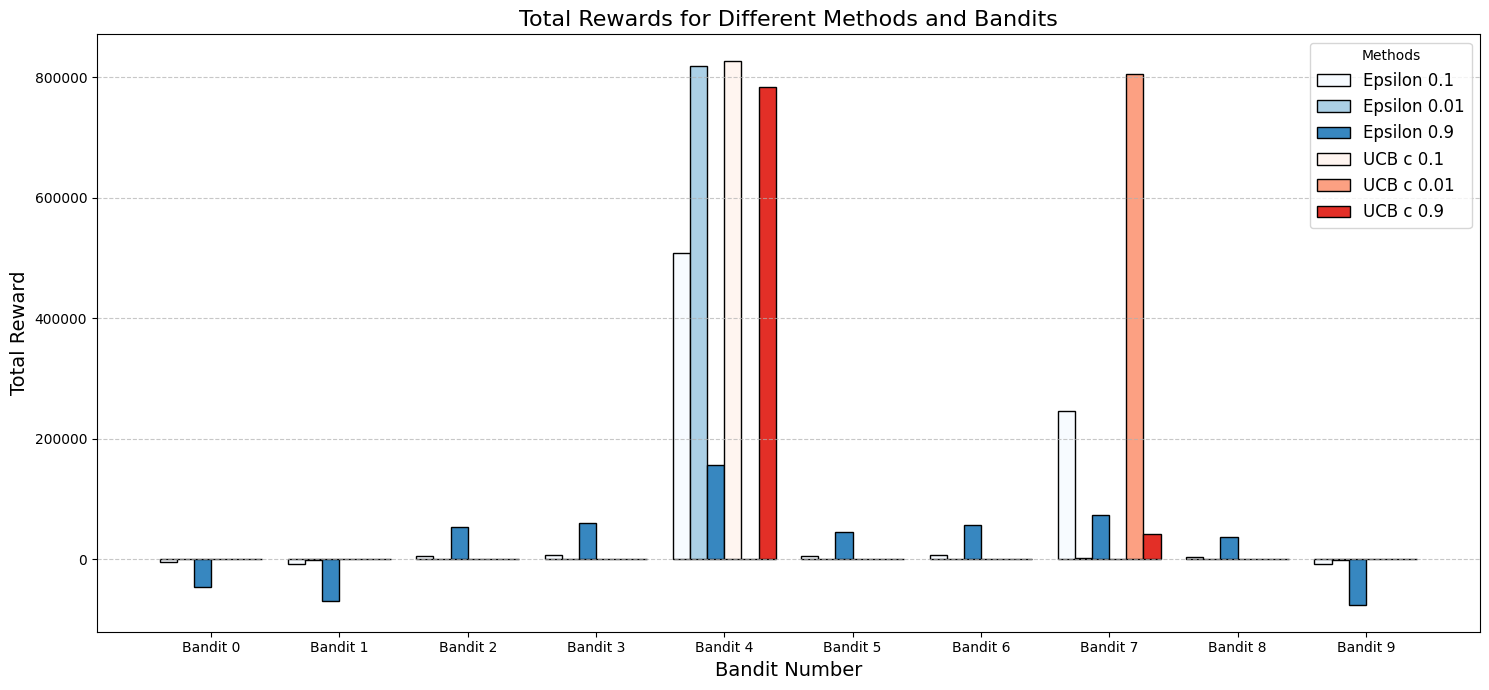

In [329]:

final_rewards = np.zeros((len(total_reward), bandit_amount))
for i in range(len(total_reward)): 
    final_rewards[i] = np.sum(total_reward[i], axis=1)

# Bar width calculation based on the number of methods
bar_width = 0.8 / len(total_reward)  # Dynamically adjust width

plt.figure(figsize=(15, 7))

# Offsets for shifting the bars
x_positions = np.arange(bandit_amount)  # Original positions (bandit indices)
shift = (len(total_reward) - 1) * bar_width / 2  # Centering shift

# Plot each method's reward as a bar
for i in range(len(total_reward)):
    if i < len(epsilon):
        label = f"Epsilon {epsilon[i]}"
        color = plt.cm.Blues(i / len(epsilon))  # Shades of blue for epsilon methods
    else:
        label = f"UCB c {c_value[i - len(epsilon)]}"
        color = plt.cm.Reds((i - len(epsilon)) / len(c_value))  # Shades of red for UCB
    
    # Shift bars by `shift` to center them around each bandit number
    plt.bar(x_positions - shift + i * bar_width, final_rewards[i], width=bar_width, label=label, color=color, edgecolor="black")

# Formatting the plot
plt.xlabel('Bandit Number', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Total Rewards for Different Methods and Bandits', fontsize=16)

# Adjust x-ticks to the middle of grouped bars
plt.xticks(x_positions, [f'Bandit {b}' for b in x_positions])

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(title="Methods", fontsize=12)
plt.tight_layout()

plt.show()


- From the graph total reward show the Agent are mostly pull Bandit 4 and Bandit 7 because from the fixed reward bandit, the bandits with the most rewards are bandit number 4, followed by 7.

### Cumulative action and Cumulative reward vs Timesteps

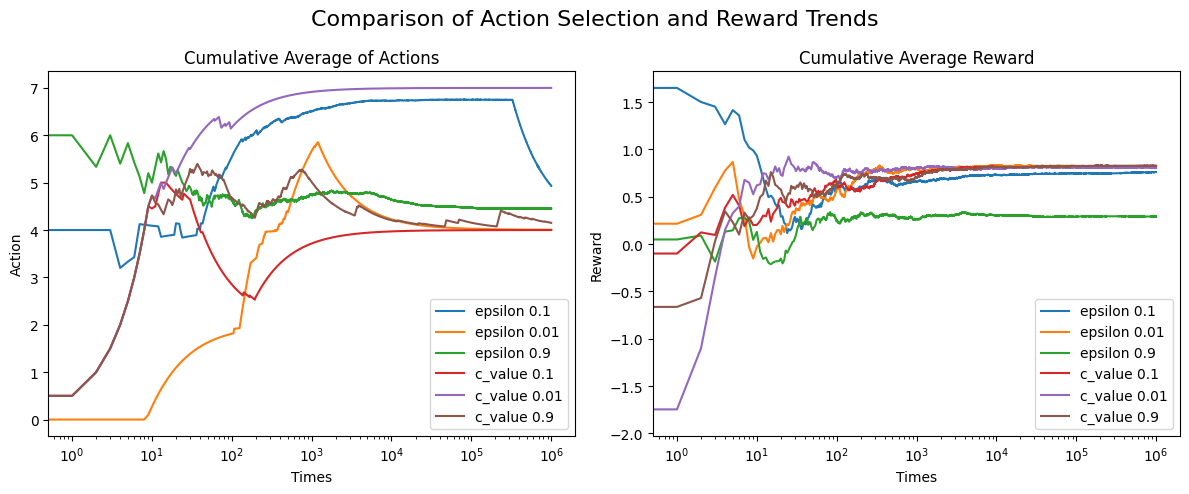

In [330]:
fig, axes = plt.subplots(1, 2,figsize=(12, 5)) 
for i in range(len(epsilon)):
    axes[0].plot(cumulative_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[0].plot(cumulative_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[0].set_xlabel('Times')
axes[0].set_ylabel('Action')
axes[0].set_xscale('log')
axes[0].set_title('Cumulative Average of Actions')
axes[0].legend()
for i in range(len(epsilon)):
    axes[1].plot(cumulative_reward_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[1].set_xlabel('Times')
axes[1].set_ylabel('Reward')
axes[1].set_xscale('log')
axes[1].set_title('Cumulative Average Reward')
axes[1].legend()
fig.suptitle('Comparison of Action Selection and Reward Trends', fontsize=16)
plt.tight_layout()
plt.show()

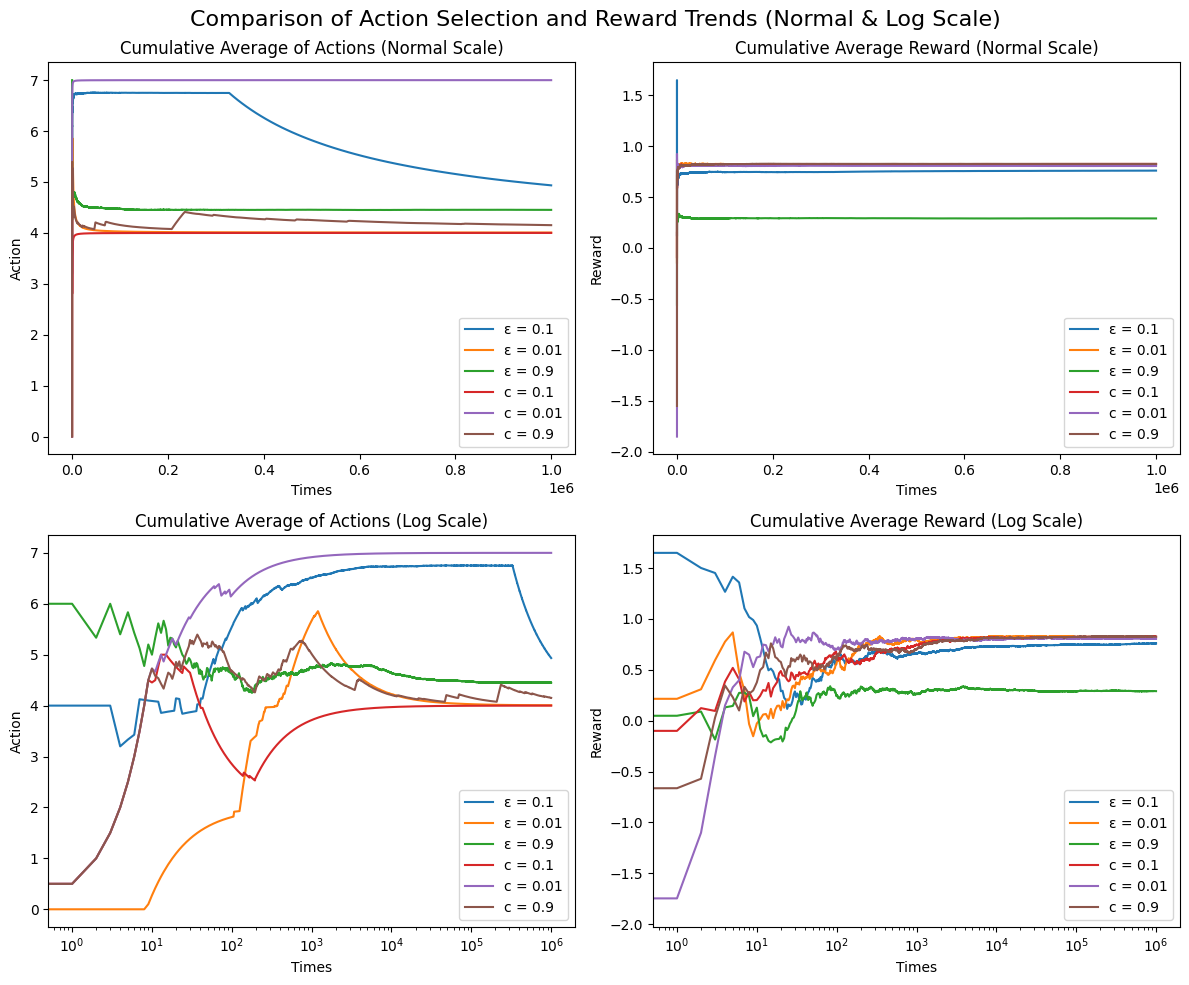

In [331]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# First plot: Cumulative average (normal scale)
for i in range(len(epsilon)):
    axes[0, 0].plot(cumulative_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[0, 0].plot(cumulative_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[0, 0].set_xlabel('Times')
axes[0, 0].set_ylabel('Action')
axes[0, 0].set_title('Cumulative Average of Actions (Normal Scale)')
axes[0, 0].legend()

# Second plot: Cumulative reward (normal scale)
for i in range(len(epsilon)):
    axes[0, 1].plot(cumulative_reward_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[0, 1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[0, 1].set_xlabel('Times')
axes[0, 1].set_ylabel('Reward')
axes[0, 1].set_title('Cumulative Average Reward (Normal Scale)')
axes[0, 1].legend()

# Third plot: Cumulative average (log scale)
for i in range(len(epsilon)):
    axes[1, 0].plot(cumulative_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[1, 0].plot(cumulative_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[1, 0].set_xlabel('Times')
axes[1, 0].set_ylabel('Action')
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('Cumulative Average of Actions (Log Scale)')
axes[1, 0].legend()

# Fourth plot: Cumulative reward (log scale)
for i in range(len(epsilon)):
    axes[1, 1].plot(cumulative_reward_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[1, 1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[1, 1].set_xlabel('Times')
axes[1, 1].set_ylabel('Reward')
axes[1, 1].set_xscale('log')
axes[1, 1].set_title('Cumulative Average Reward (Log Scale)')
axes[1, 1].legend()

# Add a super title for clarity
fig.suptitle('Comparison of Action Selection and Reward Trends (Normal & Log Scale)', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Greedy epsilon (timesteps vs reward for each bandit.)

C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_26664\1414923794.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Aitthikit\Desktop\DRL_HW1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


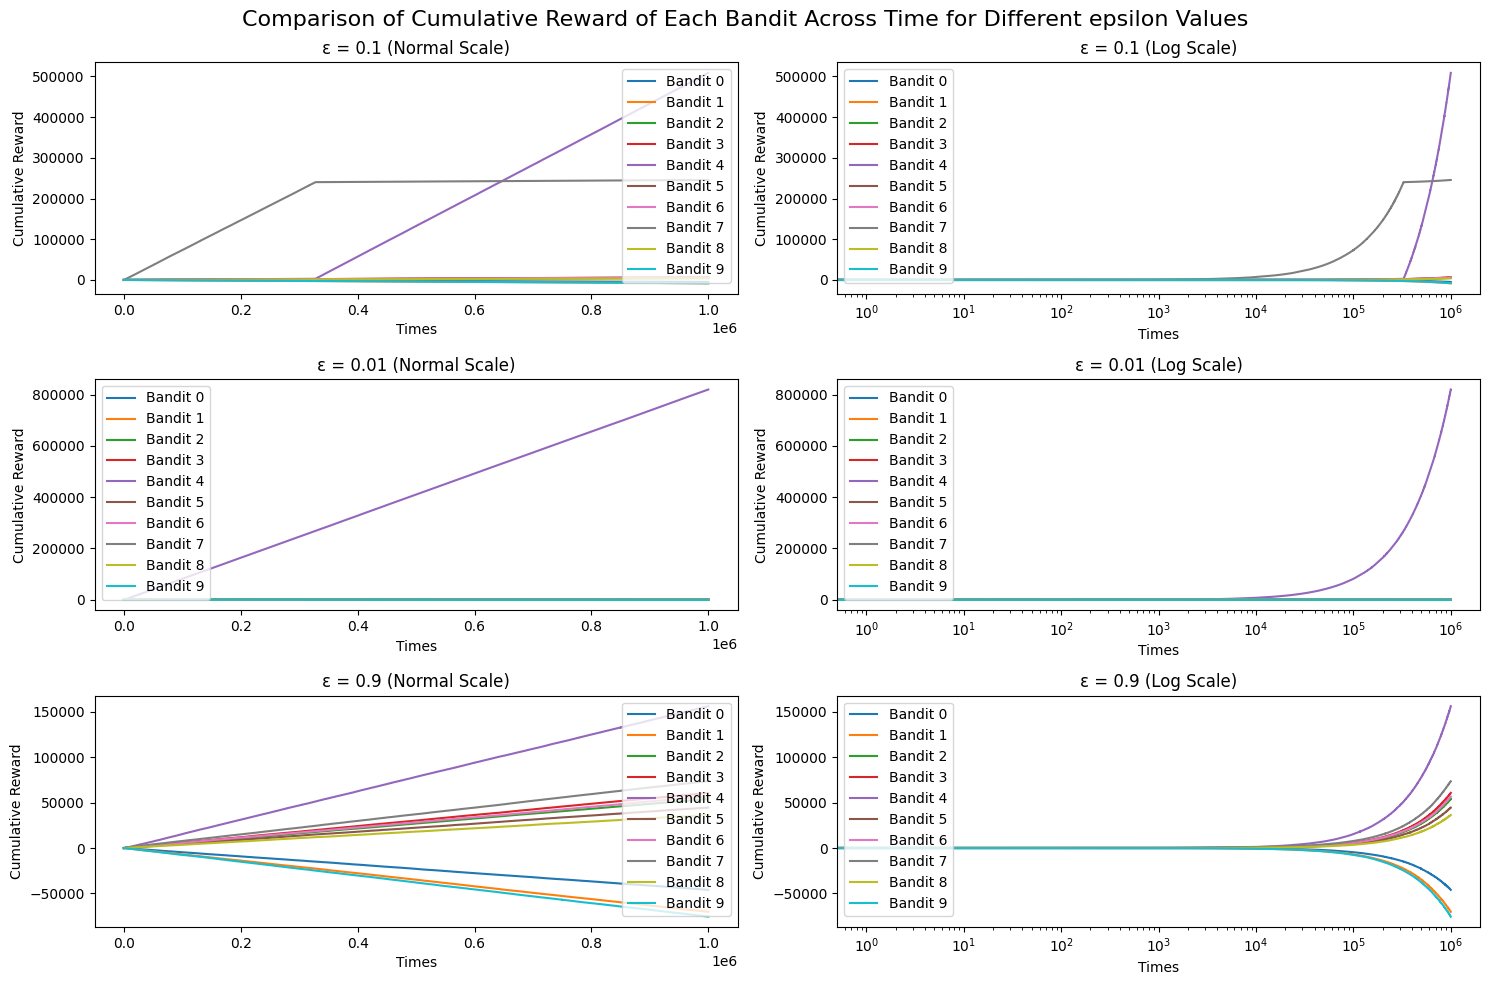

In [332]:
fig, axes = plt.subplots(len(epsilon), 2, figsize=(15, 10))  # 2 rows, dynamic columns

for i in range(len(epsilon)):
    for bandit in range(bandit_amount):
        # Top row: Normal scale
        axes[i, 0].plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]), label=f'Bandit {bandit}')
        
        # Bottom row: Log scale
        axes[i, 1].plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]), label=f'Bandit {bandit}')
        axes[i, 1].set_xscale('log')  # Log scale for the bottom row

    # Set labels and titles
    axes[i, 0].set_xlabel('Times')
    axes[i, 0].set_ylabel('Cumulative Reward')
    axes[i, 0].set_title(f'ε = {epsilon[i]} (Normal Scale)')
    axes[i, 0].legend()

    axes[i, 1].set_xlabel('Times')
    axes[i, 1].set_ylabel('Cumulative Reward')
    axes[i, 1].set_title(f'ε = {epsilon[i]} (Log Scale)')
    axes[i, 1].legend()

# Adjust layout to fit well
fig.suptitle('Comparison of Cumulative Reward of Each Bandit Across Time for Different epsilon Values', fontsize=16)
plt.tight_layout()
plt.show()

### UCB (timesteps vs reward for each bandit.)

C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_26664\3646386489.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


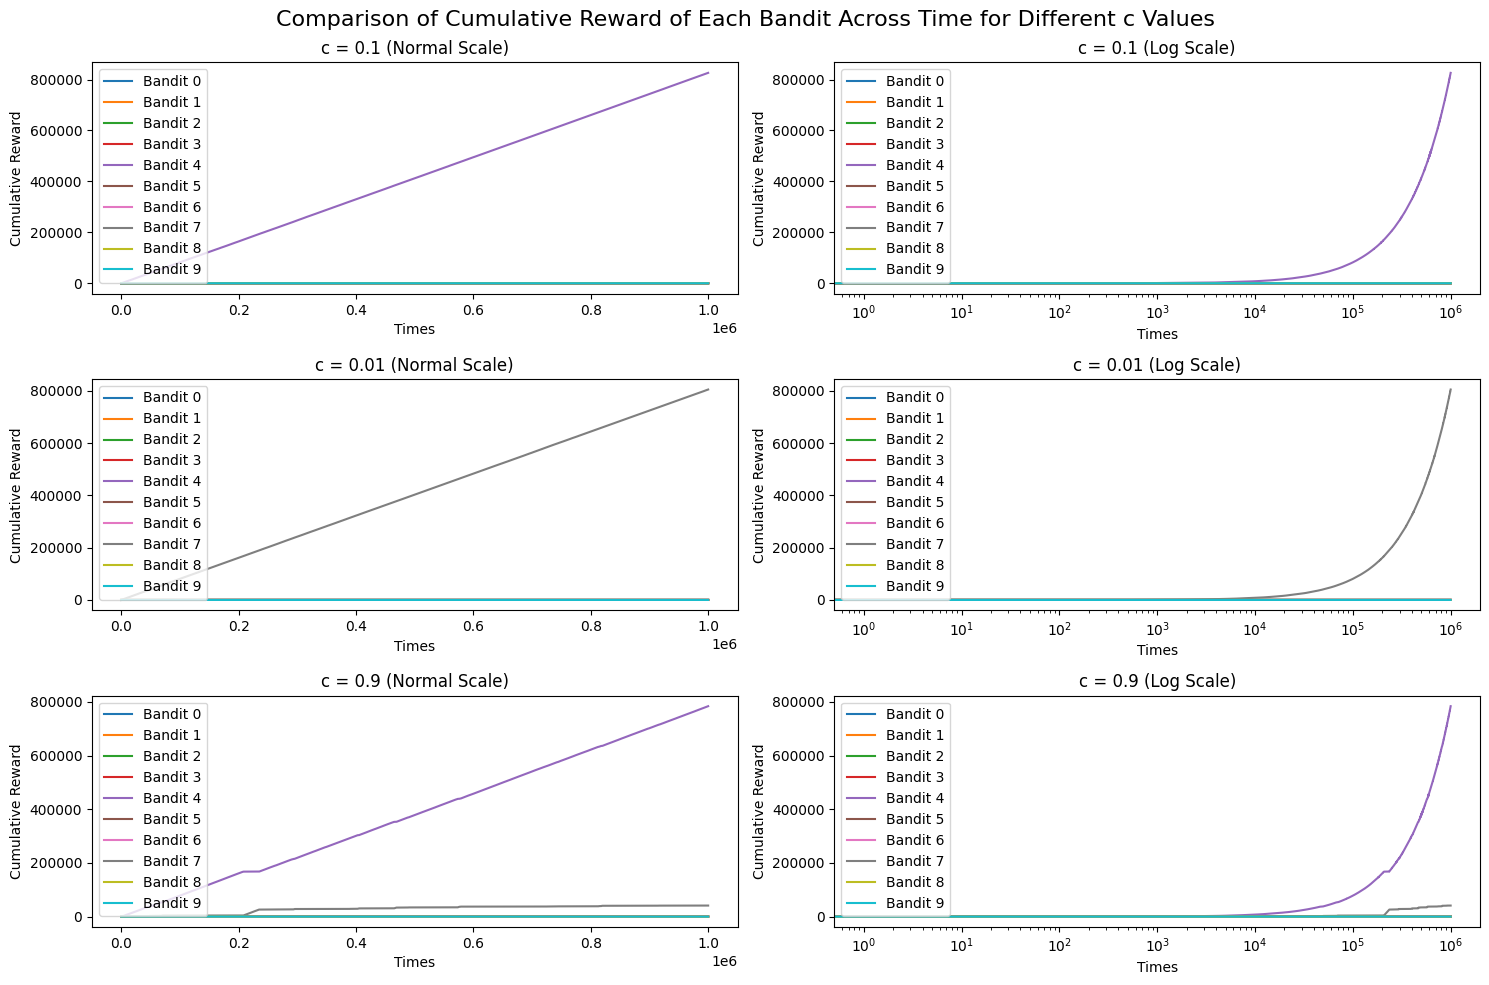

In [333]:
fig, axes = plt.subplots(len(c_value), 2, figsize=(15, 10))  # len(c_value) rows, 2 columns (Normal & Log Scale)

for i in range(len(c_value)):
    for bandit in range(bandit_amount):
        # Left column: Normal Scale
        axes[i, 0].plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon) + i][bandit]), label=f'Bandit {bandit}')
        
        # Right column: Log Scale
        axes[i, 1].plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon) + i][bandit]), label=f'Bandit {bandit}')
        axes[i, 1].set_xscale('log')  # Log scale for the right column

    # Set labels and titles for the left column (Normal Scale)
    axes[i, 0].set_xlabel('Times')
    axes[i, 0].set_ylabel('Cumulative Reward')
    axes[i, 0].set_title(f'c = {c_value[i]} (Normal Scale)')
    axes[i, 0].legend()

    # Set labels and titles for the right column (Log Scale)
    axes[i, 1].set_xlabel('Times')
    axes[i, 1].set_ylabel('Cumulative Reward')
    axes[i, 1].set_title(f'c = {c_value[i]} (Log Scale)')
    axes[i, 1].legend()

# Adjust layout to fit well in Jupyter Notebook
fig.suptitle('Comparison of Cumulative Reward of Each Bandit Across Time for Different c Values', fontsize=16)
plt.tight_layout()
plt.show()

- df
- df

## Configuration Test Scripts 2

In [334]:
bandit_amount = 10
epsilon = [0.1,0.01,0.9]
n_time = 1000000
c_value = [0.1,0.01,0.9]
Set1 = Multi_Armed_Bandit(bandit_amount,mode = 0) # mode = 0 => fix || mode = 1 => random
greedy_Agent = Agent_greedy(bandit_amount)
UCB_Agent = Agent_UCB(bandit_amount)

print(Set1.get_means())

[-0.50771065, -0.78082101, 0.59902529, 0.67058601, 0.82758957, 0.49655859, 0.63167973, 0.80476759, 0.41086208, -0.83697453]


- Configulation parameter
    - bandit_amount = amount of bandit
    - epsilon = epsilon value for experiment
    - n_time = timesteps for experiment
    - c_value = c value for experiment

## Test Scripts 2 

In [335]:
total_reward = [] # Total reward from each bandit
bandit_rewards = np.zeros((bandit_amount, n_time)) # Reward from each bandit with timesteps
data = np.empty(n_time) # Total reward from all bandit
data_action = np.empty(n_time) # Total action from each Agent
cumulative_avg = [] # cumulative action 
cumulative_reward_avg = [] # cumulative reward (return)

In [336]:
for i in range(len(epsilon)):
    greedy_Agent.epsilon = epsilon[i]
    print(epsilon[i])
    for t in range(n_time):
        action = greedy_Agent.select_action()
        reward = Set1.pull(action)
        greedy_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    greedy_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.1
0.01
0.9


In [337]:
for i in range(len(c_value)):
    UCB_Agent.c = c_value[i]
    print(c_value[i])
    for t in range(n_time):
        action = UCB_Agent.select_action()
        reward = Set1.pull(action)
        UCB_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    UCB_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.1
0.01
0.9


In [338]:
for i in range(len(Set1.get_means())):
    print(f"Prop{i} = {Set1.get_means()[i]}")

Prop0 = -0.50771065
Prop1 = -0.78082101
Prop2 = 0.59902529
Prop3 = 0.67058601
Prop4 = 0.82758957
Prop5 = 0.49655859
Prop6 = 0.63167973
Prop7 = 0.80476759
Prop8 = 0.41086208
Prop9 = -0.83697453


## Result 2

### Reward vs Bandit

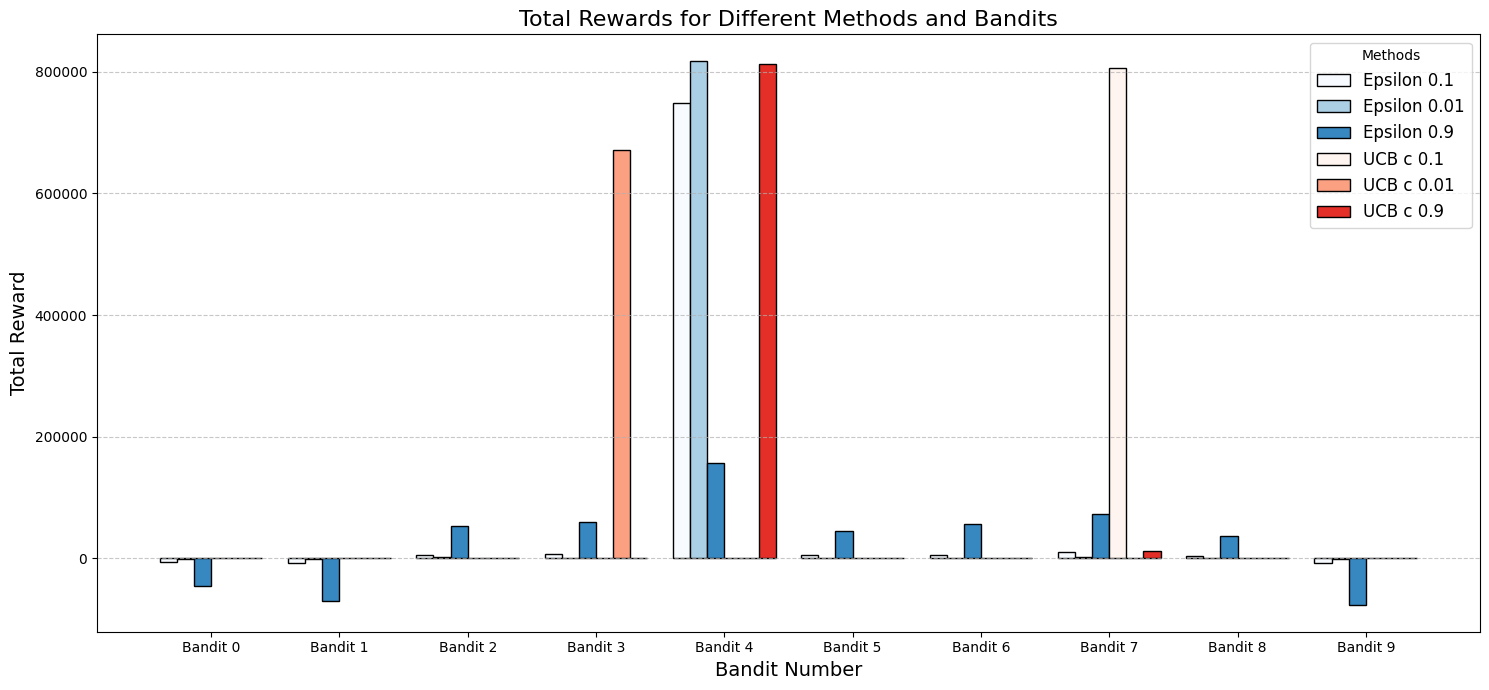

In [339]:

final_rewards = np.zeros((len(total_reward), bandit_amount))
for i in range(len(total_reward)): 
    final_rewards[i] = np.sum(total_reward[i], axis=1)

# Bar width calculation based on the number of methods
bar_width = 0.8 / len(total_reward)  # Dynamically adjust width

plt.figure(figsize=(15, 7))

# Offsets for shifting the bars
x_positions = np.arange(bandit_amount)  # Original positions (bandit indices)
shift = (len(total_reward) - 1) * bar_width / 2  # Centering shift

# Plot each method's reward as a bar
for i in range(len(total_reward)):
    if i < len(epsilon):
        label = f"Epsilon {epsilon[i]}"
        color = plt.cm.Blues(i / len(epsilon))  # Shades of blue for epsilon methods
    else:
        label = f"UCB c {c_value[i - len(epsilon)]}"
        color = plt.cm.Reds((i - len(epsilon)) / len(c_value))  # Shades of red for UCB
    
    # Shift bars by `shift` to center them around each bandit number
    plt.bar(x_positions - shift + i * bar_width, final_rewards[i], width=bar_width, label=label, color=color, edgecolor="black")

# Formatting the plot
plt.xlabel('Bandit Number', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Total Rewards for Different Methods and Bandits', fontsize=16)

# Adjust x-ticks to the middle of grouped bars
plt.xticks(x_positions, [f'Bandit {b}' for b in x_positions])

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(title="Methods", fontsize=12)
plt.tight_layout()

plt.show()


- From the graph total reward show the Agent are mostly pull Bandit 4 and Bandit 7 because from the fixed reward bandit, the bandits with the most rewards are bandit number 4, followed by 7.

### Cumulative action and Cumulative reward vs Timesteps

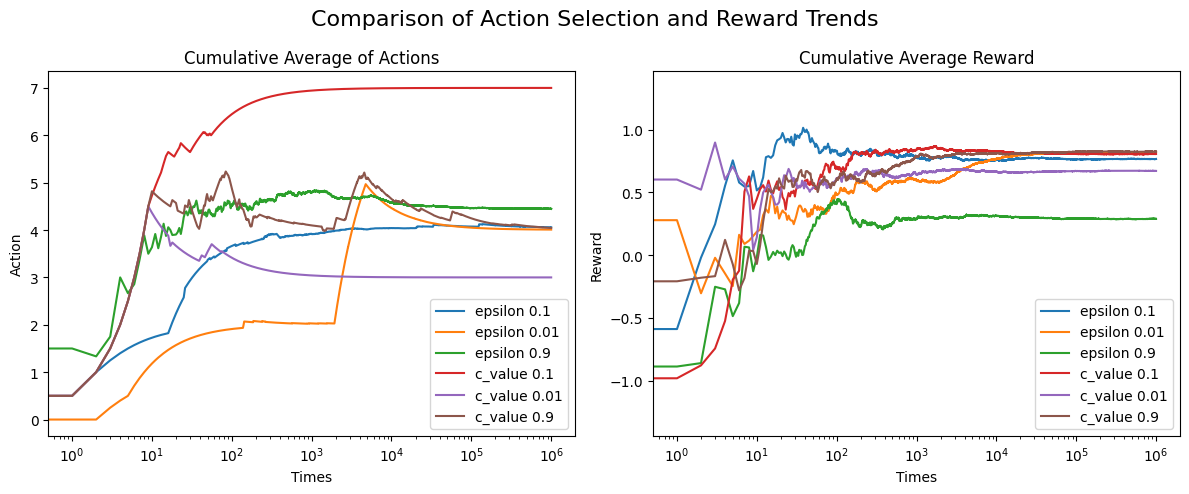

In [340]:
fig, axes = plt.subplots(1, 2,figsize=(12, 5)) 
for i in range(len(epsilon)):
    axes[0].plot(cumulative_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[0].plot(cumulative_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[0].set_xlabel('Times')
axes[0].set_ylabel('Action')
axes[0].set_xscale('log')
axes[0].set_title('Cumulative Average of Actions')
axes[0].legend()
for i in range(len(epsilon)):
    axes[1].plot(cumulative_reward_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[1].set_xlabel('Times')
axes[1].set_ylabel('Reward')
axes[1].set_xscale('log')
axes[1].set_title('Cumulative Average Reward')
axes[1].legend()
fig.suptitle('Comparison of Action Selection and Reward Trends', fontsize=16)
plt.tight_layout()
plt.show()

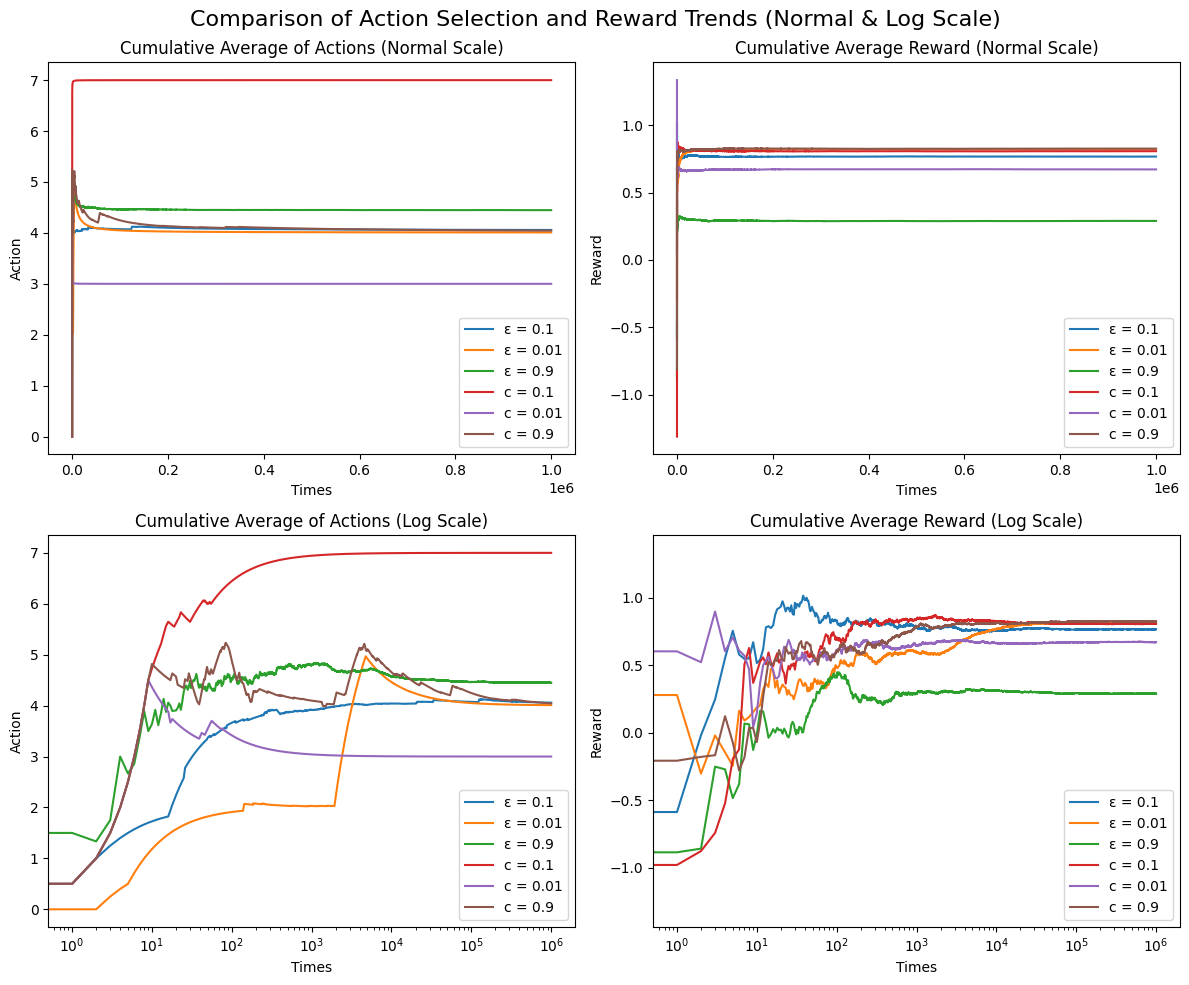

In [341]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# First plot: Cumulative average (normal scale)
for i in range(len(epsilon)):
    axes[0, 0].plot(cumulative_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[0, 0].plot(cumulative_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[0, 0].set_xlabel('Times')
axes[0, 0].set_ylabel('Action')
axes[0, 0].set_title('Cumulative Average of Actions (Normal Scale)')
axes[0, 0].legend()

# Second plot: Cumulative reward (normal scale)
for i in range(len(epsilon)):
    axes[0, 1].plot(cumulative_reward_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[0, 1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[0, 1].set_xlabel('Times')
axes[0, 1].set_ylabel('Reward')
axes[0, 1].set_title('Cumulative Average Reward (Normal Scale)')
axes[0, 1].legend()

# Third plot: Cumulative average (log scale)
for i in range(len(epsilon)):
    axes[1, 0].plot(cumulative_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[1, 0].plot(cumulative_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[1, 0].set_xlabel('Times')
axes[1, 0].set_ylabel('Action')
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('Cumulative Average of Actions (Log Scale)')
axes[1, 0].legend()

# Fourth plot: Cumulative reward (log scale)
for i in range(len(epsilon)):
    axes[1, 1].plot(cumulative_reward_avg[i], label=f'ε = {epsilon[i]}')
for i in range(len(c_value)):
    axes[1, 1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c = {c_value[i]}')

axes[1, 1].set_xlabel('Times')
axes[1, 1].set_ylabel('Reward')
axes[1, 1].set_xscale('log')
axes[1, 1].set_title('Cumulative Average Reward (Log Scale)')
axes[1, 1].legend()

# Add a super title for clarity
fig.suptitle('Comparison of Action Selection and Reward Trends (Normal & Log Scale)', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Greedy epsilon (timesteps vs reward for each bandit.)

C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_26664\1414923794.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Aitthikit\Desktop\DRL_HW1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


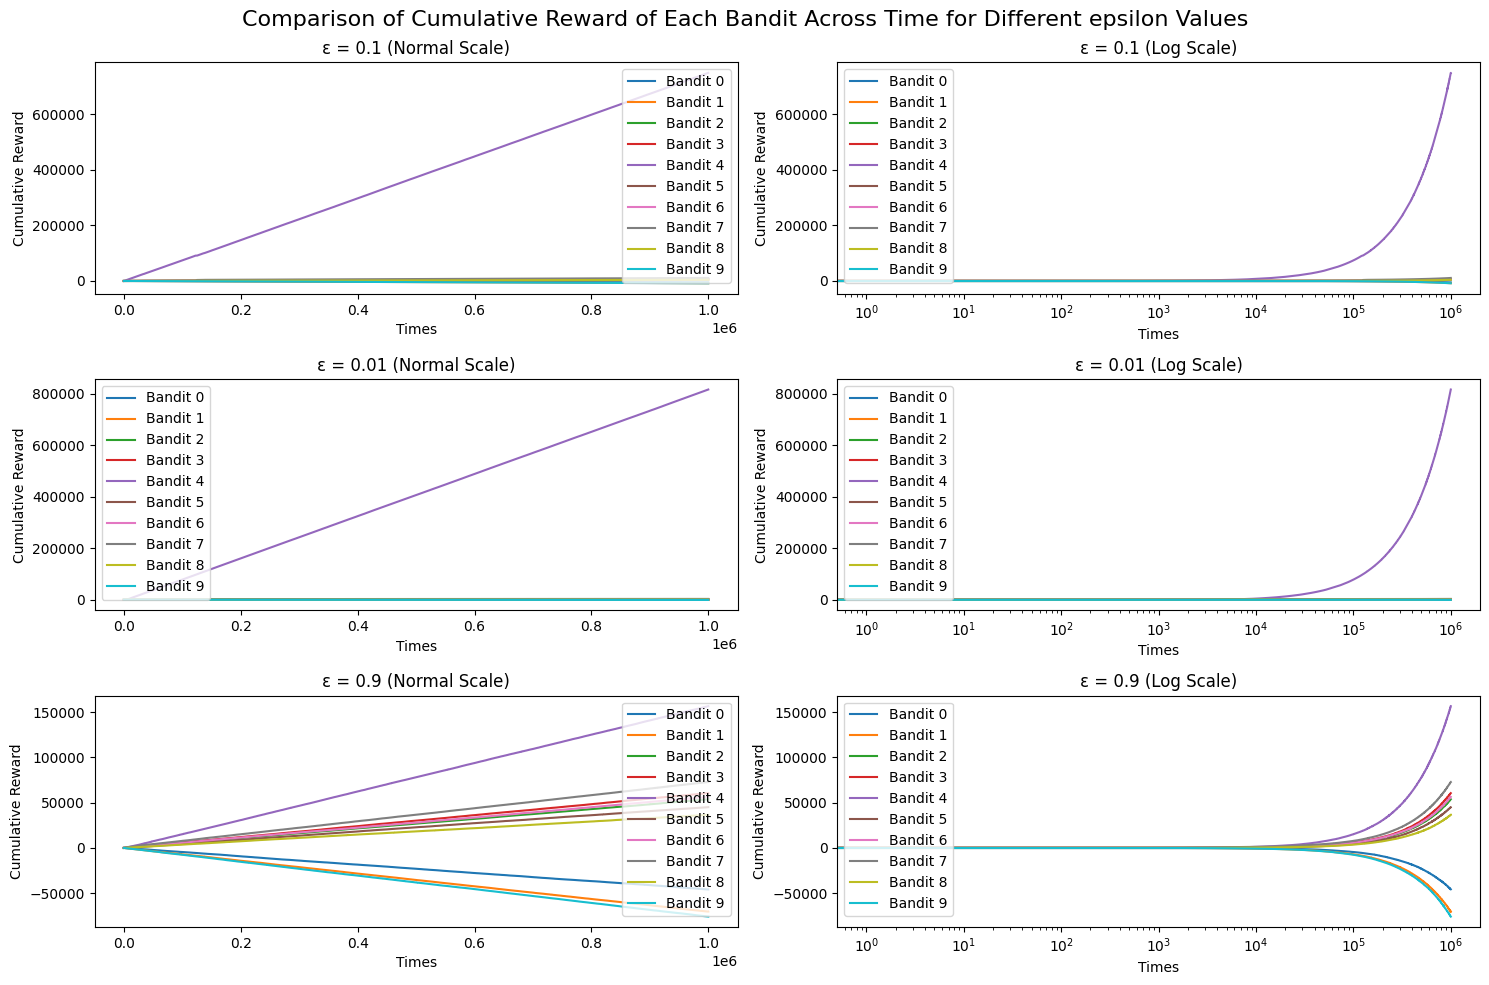

In [342]:
fig, axes = plt.subplots(len(epsilon), 2, figsize=(15, 10))  # 2 rows, dynamic columns

for i in range(len(epsilon)):
    for bandit in range(bandit_amount):
        # Top row: Normal scale
        axes[i, 0].plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]), label=f'Bandit {bandit}')
        
        # Bottom row: Log scale
        axes[i, 1].plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]), label=f'Bandit {bandit}')
        axes[i, 1].set_xscale('log')  # Log scale for the bottom row

    # Set labels and titles
    axes[i, 0].set_xlabel('Times')
    axes[i, 0].set_ylabel('Cumulative Reward')
    axes[i, 0].set_title(f'ε = {epsilon[i]} (Normal Scale)')
    axes[i, 0].legend()

    axes[i, 1].set_xlabel('Times')
    axes[i, 1].set_ylabel('Cumulative Reward')
    axes[i, 1].set_title(f'ε = {epsilon[i]} (Log Scale)')
    axes[i, 1].legend()

# Adjust layout to fit well
fig.suptitle('Comparison of Cumulative Reward of Each Bandit Across Time for Different epsilon Values', fontsize=16)
plt.tight_layout()
plt.show()

### UCB (timesteps vs reward for each bandit.)

C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_26664\3646386489.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


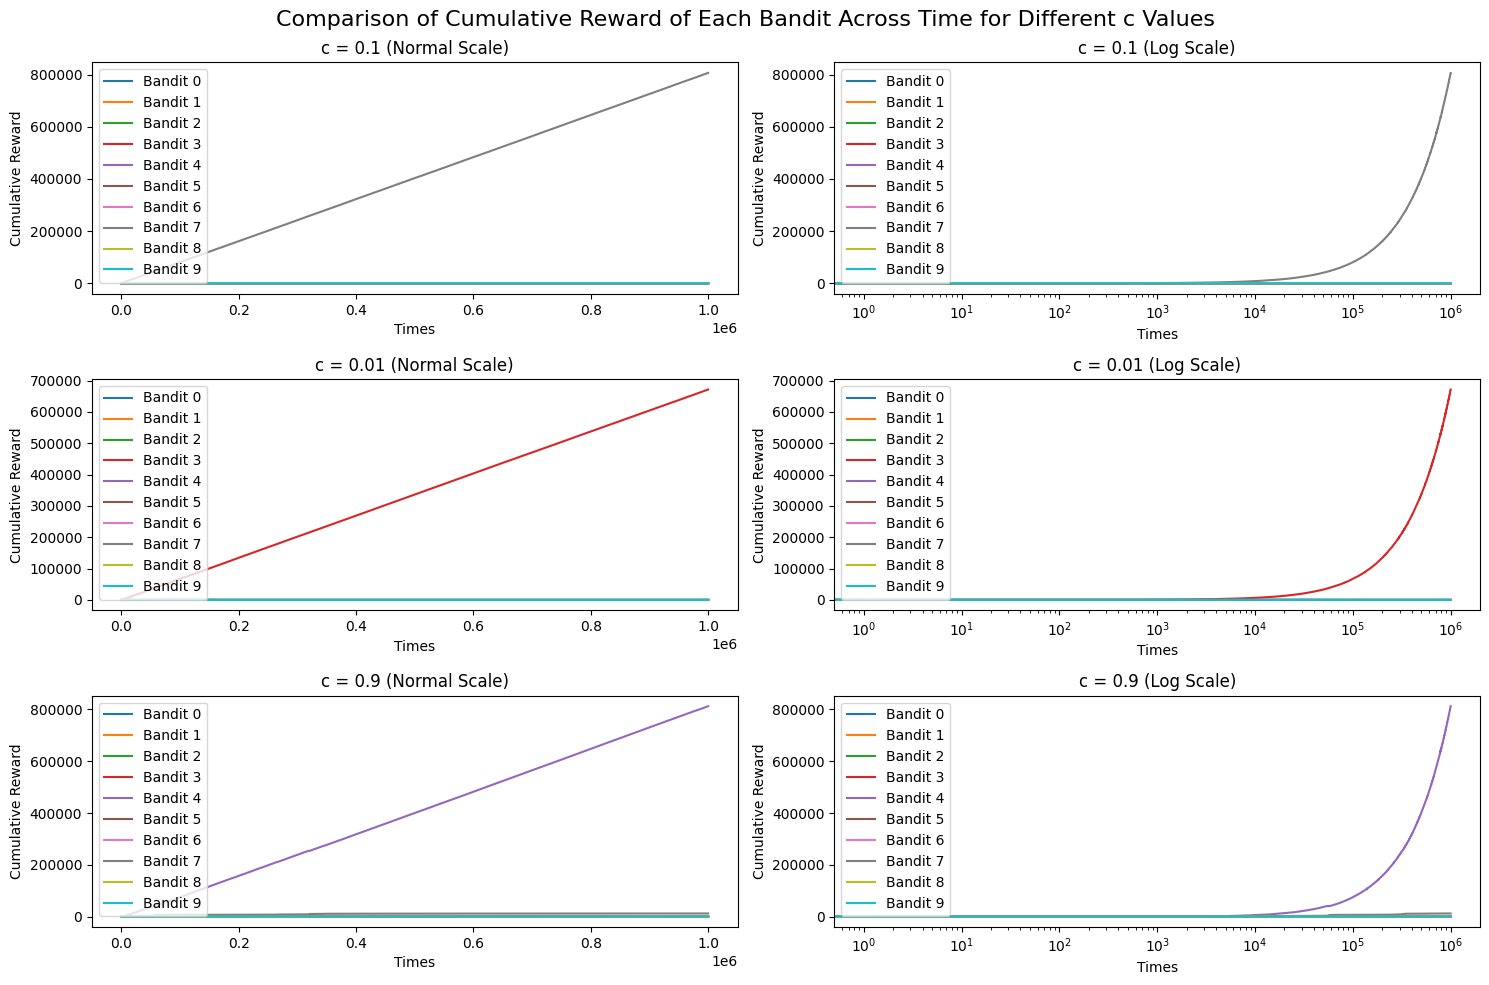

In [343]:
fig, axes = plt.subplots(len(c_value), 2, figsize=(15, 10))  # len(c_value) rows, 2 columns (Normal & Log Scale)

for i in range(len(c_value)):
    for bandit in range(bandit_amount):
        # Left column: Normal Scale
        axes[i, 0].plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon) + i][bandit]), label=f'Bandit {bandit}')
        
        # Right column: Log Scale
        axes[i, 1].plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon) + i][bandit]), label=f'Bandit {bandit}')
        axes[i, 1].set_xscale('log')  # Log scale for the right column

    # Set labels and titles for the left column (Normal Scale)
    axes[i, 0].set_xlabel('Times')
    axes[i, 0].set_ylabel('Cumulative Reward')
    axes[i, 0].set_title(f'c = {c_value[i]} (Normal Scale)')
    axes[i, 0].legend()

    # Set labels and titles for the right column (Log Scale)
    axes[i, 1].set_xlabel('Times')
    axes[i, 1].set_ylabel('Cumulative Reward')
    axes[i, 1].set_title(f'c = {c_value[i]} (Log Scale)')
    axes[i, 1].legend()

# Adjust layout to fit well in Jupyter Notebook
fig.suptitle('Comparison of Cumulative Reward of Each Bandit Across Time for Different c Values', fontsize=16)
plt.tight_layout()
plt.show()

- df
- df

## Conclusion